In [ ]:
# Key takeaways:
# 1 - Ride frequency is higher in Urban areas and employ more drivers than their suburban and rural counterparts, representing 63% and 87%, respectively, of the total. 
# 2 - The largest component of total revenue is Urban areas at 63%, followed by Suburban (~30%) and Rural (7%).
# 3 - There are a lower number of Rural drivers, yet average fares are higher than Urban and Suburban areas.

In [107]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load Files
city_data_to_load = r"C:\Users\May 2018/Desktop/SMU Bootcamp Doc/Homework Files/city_data.csv"
ride_data_to_load = r"C:\Users\May 2018/Desktop/SMU Bootcamp Doc/Homework Files/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_data = pd.merge(ride_data, city_data, on="city")
merged_data2 = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
merged_data2.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

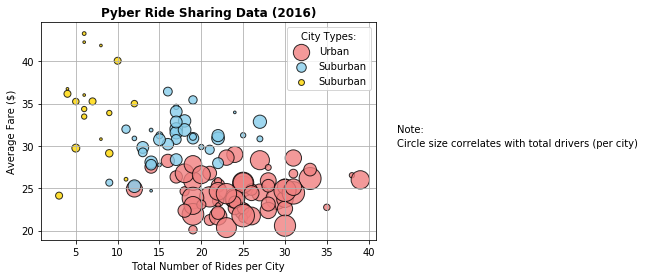

In [173]:
# Determine metrics
# Average Fare: Group data by city by type 
urban_avg_fare = merged_data2[merged_data2.type == 'Urban'].groupby(['city']).mean()[["fare"]]
suburban_avg_fare = merged_data2[merged_data2.type == 'Suburban'].groupby(['city']).mean()[["fare"]]
rural_avg_fare = merged_data2[merged_data2.type == 'Rural'].groupby(['city']).mean()[["fare"]]

# Total Number of Rides: Group data by city by type 
urban_num_rides = merged_data2[merged_data2.type == 'Urban'].groupby(['city']).count()[["ride_id"]]
suburban_num_rides = merged_data2[merged_data2.type == 'Suburban'].groupby(['city']).count()[["ride_id"]]
rural_num_rides = merged_data2[merged_data2.type == 'Rural'].groupby(['city']).count()[["ride_id"]]

# Total Drivers: Group data by city by type 
urban_drivers = merged_data2[merged_data2.type == 'Urban'].groupby(['city']).mean()[["driver_count"]]
suburban_drivers = merged_data2[merged_data2.type == 'Suburban'].groupby(['city']).mean()[["driver_count"]]
rural_drivers = merged_data2[merged_data2.type == 'Rural'].groupby(['city']).mean()[["driver_count"]]

# Create each scatter plot
plt.scatter(urban_num_rides, urban_avg_fare, marker="o", facecolors="lightcoral", edgecolors="black", s=urban_drivers*7, alpha=0.8, label="Urban")
plt.scatter(suburban_num_rides, suburban_avg_fare, marker="o", facecolors="skyblue", edgecolors="black", s=suburban_drivers*7, alpha=0.8, label="Suburban")
plt.scatter(rural_num_rides, rural_avg_fare, marker="o", facecolors="gold", edgecolors="black", s=rural_drivers*7, alpha=0.8, label="Suburban")


# Create a legend
plt.legend(loc="best", title="City Types:")

# Set a Title and labels
plt.title("Pyber Ride Sharing Data (2016)", fontweight='bold')
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.grid()

# Incorporate a text label regarding circle size 
plt.figtext(.95, 0.5,"Note:", wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(.95, 0.45,"Circle size correlates with total drivers (per city)", horizontalalignment='left', fontsize=10)

# Save Figure and print
plt.savefig("C:/Users/May 2018/Pictures/Saved Pictures/Pyberscatterplot.png")
plt.show()

In [167]:
# Show plot
plt.show()

## Total Fares by City Type

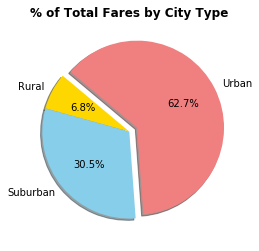

In [168]:
# Calculate Total Fares by Type
total_fare_type = merged_data2.groupby(['type']).sum()[["fare"]]

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
plt.title("% of Total Fares by City Type", fontweight='bold')
colors = ["gold","skyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(total_fare_type, labels=labels, colors=colors, autopct="%1.1f%%", explode=explode, shadow=True, startangle=140)

#Save Figure and display
plt.savefig("C:/Users/May 2018/Pictures/Saved Pictures/Pyberpie1.png")
plt.show()

In [169]:
# Show Figure
plt.show()

## Total Rides by City Type

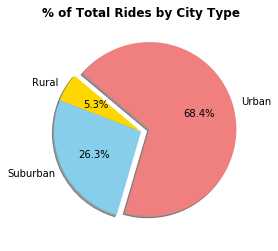

In [170]:
# Calculate Ride Percents
total_ride_type = merged_data2.groupby(['type']).count()[["fare"]]

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
plt.title("% of Total Rides by City Type", fontweight='bold')
colors = ["gold","skyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(total_ride_type, labels=labels, colors=colors, autopct="%1.1f%%", explode=explode, shadow=True, startangle=140)

# Save Figure and display
plt.savefig("C:/Users/May 2018/Pictures/Saved Pictures/Pyberpie2.png")
plt.show()

In [171]:
# Show Figure
plt.show()

## Total Drivers by City Type

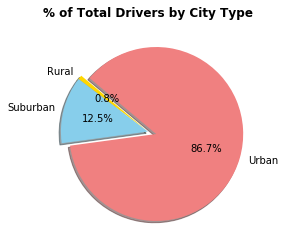

In [172]:
# Calculate total drivers
total_drivers_type = merged_data2.groupby(['type']).sum()[["driver_count"]]

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
plt.title("% of Total Drivers by City Type",fontweight='bold')
colors = ["gold","skyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(total_drivers_type, labels=labels, colors=colors, autopct="%1.1f%%", explode=explode, shadow=True, startangle=140)

# Save Figure and display
plt.savefig("C:/Users/May 2018/Pictures/Saved Pictures/Pyberpie3.png")
plt.show()

# Show Figure
plt.show()